In [43]:
import pandas as pd
import synapseclient
import seaborn as sns
import matplotlib.pyplot as plt

syn = synapseclient.Synapse()
username, password = open('/Users/mauliknariya/synapse_login.txt').read().splitlines()
syn.login(username, password)

sns.set(style='darkgrid', font_scale=1.25)


UPGRADE AVAILABLE

A more recent version of the Synapse Client (2.0.0) is available. Your version (1.9.4) can be upgraded by typing:
    pip install --upgrade synapseclient

Python Synapse Client version 2.0.0 release notes

https://python-docs.synapse.org/build/html/news.html



Welcome, Maulik Nariya!



In [44]:
def label_func(x, all_vals):
    absolute = int(round(x/100.*np.sum(all_vals)))
    return absolute

Text(0.5, 0, 'Number of cell lines')

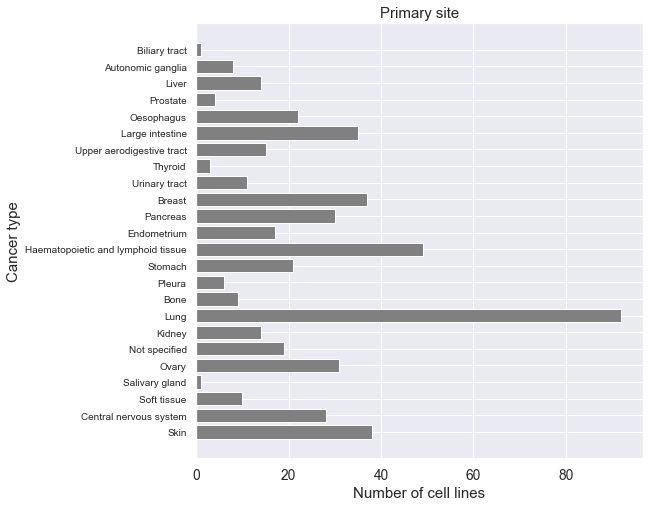

In [109]:
# Cell primary site 
dfcells = pd.read_csv('../resources/cell_info.csv')
dfcells = dfcells.fillna('Not specified')
site_primary = dfcells.site_primary.tolist()
site_names = dfcells.site_primary.unique().tolist()
site_count = [site_primary.count(sn) for sn in site_names]
site_names = [sn.capitalize().replace('_', ' ')
              for sn in site_names]
plt.figure(figsize=(8,8))
plt.barh(width=site_count, y=site_names, color='grey')
plt.title('Primary site')
plt.yticks(fontsize=10)
plt.ylabel('Cancer type')
plt.xlabel('Number of cell lines')

Text(0.5, 0, 'Number of cell lines')

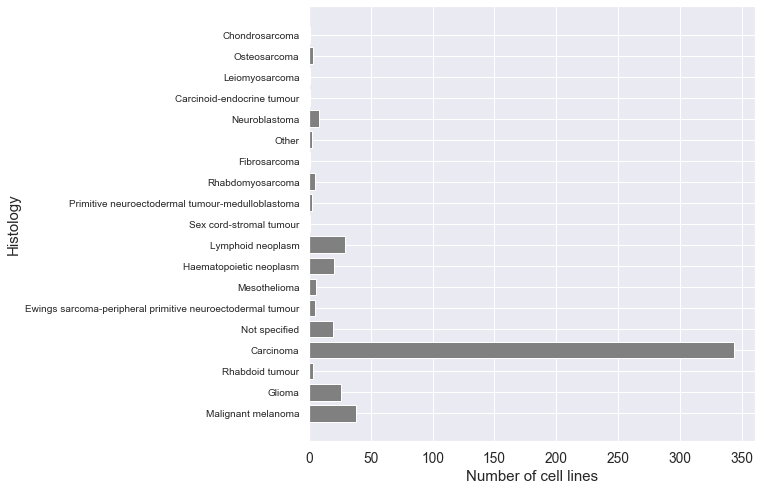

In [111]:
# Cell histolog
histology = dfcells.histology.tolist()
hist_names = dfcells.histology.unique().tolist()
hist_count = [histology.count(hn) for hn in hist_names]
hist_names = [hn.capitalize().replace('_', ' ')
              for hn in hist_names]
hist_names
plt.figure(figsize=(8,8))
plt.barh(width=hist_count, y=hist_names, color='grey')
plt.yticks(fontsize=10)
plt.ylabel('Histology')
plt.xlabel('Number of cell lines')